# 图像特效-色调/饱和度调整

In [5]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
src = cv2.cvtColor(cv2.imread('../datas/f4.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [11]:
def adjust_hsi(src,hue,saturation,ilumination):
    srci = src.astype(np.int32)
    dst = np.zeros_like(srci)
    if hue < -180:
        hue = -180
    if hue > 180:
        hue = 180
        
    if saturation<-255:
        saturation = -255
  
    if ilumination<-255:
        ilumination = -255  
  
    if hue>180:
        hue = 180
  
    if saturation>255: 
        saturation = 255  
  
    if ilumination>255:
        ilumination = 255 
    h = srci[:,:,0]
    s = srci[:,:,1]
    i = srci[:,:,2]
    
    h = h + hue
    h[h < 0] = 0
    h[h > 180] = 180
    
    s = s + saturation
    s[s < 0] = 0
    s[s > 255] = 255
    
    i = i + ilumination
    i[i < 0] = 0
    i[i > 255] = 255
    
    dst[:,:,0] = h
    dst[:,:,1] = s
    dst[:,:,2] = i
    dst = cv2.convertScaleAbs(dst)
    dst = cv2.cvtColor(dst,cv2.COLOR_HSV2RGB)
    return dst

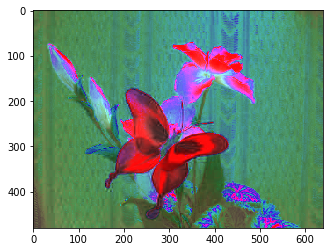

In [13]:
dst = adjust_hsi(src,-64,-10,10)
plt.imshow(dst)